In [112]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [113]:
df = pd.read_csv("train.csv")

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [116]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [117]:
df['Sex'] = np.where(df['Sex'] == 'male',1,0)

In [118]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna("Unknown")

In [119]:
df = pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [120]:
df = df.drop(columns=['Ticket','Cabin','Name','PassengerId'])

<Axes: >

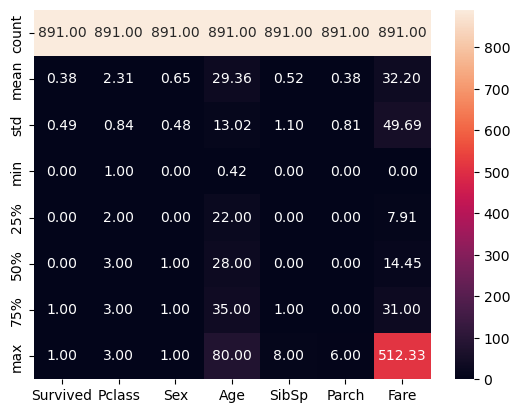

In [121]:
sns.heatmap(df.describe(),annot=True, fmt=".2f")

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [123]:
X = df.drop(columns=['Survived'])
y= df['Survived']

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [125]:
svc = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(C=1, kernel='rbf', gamma='scale'))
])
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.8435754189944135


In [127]:
df_test = pd.read_csv('test.csv')
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])
df_test['Cabin'] = df_test['Cabin'].fillna("Unknown")

In [128]:
df_test = pd.get_dummies(df_test,columns=['Embarked'],drop_first=True)
df_test['Sex'] = np.where(df_test['Sex'] == 'male',1,0)
df_test = df_test.drop(columns=['Ticket','Cabin','Name'])

In [129]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked_Q   418 non-null    bool   
 8   Embarked_S   418 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 23.8 KB


In [131]:
pred = svc.predict(df_test.drop(columns=['PassengerId']))

submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": pred
})

submission.to_csv("submission.csv", index=False)

print("Submission file created!")

Submission file created!
